In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 111)

In [3]:
data_path = ['~/gp/datasets/items_one.csv','~/gp/datasets/items_two.csv','~/gp/datasets/items_three.csv','~/gp/datasets/items_four.csv']
housing = pd.DataFrame()
for csv in data_path:
    df = pd.read_csv(csv, encoding='utf-8',low_memory=False)
    housing=housing.append(df)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575573 entries, 0 to 127608
Data columns (total 28 columns):
_type                 575573 non-null object
area                  575573 non-null object
big_district          575573 non-null object
building_structure    575573 non-null object
building_type         575573 non-null object
built_year            575573 non-null object
community             575573 non-null object
community_id          575573 non-null int64
day_on_market         575573 non-null object
decoration            575573 non-null object
elevator              575573 non-null object
five_years            575573 non-null int64
floor                 575573 non-null object
followers             575573 non-null object
house_type            575573 non-null object
huxing_structure      575573 non-null object
id                    575573 non-null object
orientation           575573 non-null object
price                 575573 non-null object
price_unit            575573 non-nul

In [4]:
housing.head()

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm
0,chengJiaoItem,59.08㎡,亦庄开发区,混合结构,板楼,1999,贵园北里戊区,1111027374770,2011-09-27,其他,无,1,中楼层(共6层),0,2室0厅1厨1卫,暂无数据,BJDX00402260,南 北,105,17773,普通住宅,一梯三户,亦庄,1,2011.09.24,0,https://bj.lianjia.com/chengjiao/BJDX00402260....,集中供暖
1,chengJiaoItem,94.12㎡,亦庄开发区,钢混结构,塔楼,2000,燕景佳园,1111027381792,2011-12-05,其他,有,1,低楼层(共17层),0,2室2厅1厨1卫,平层,BJDX00398894,南 北,131,13919,普通住宅,两梯八户,亦庄,1,2011.12.04,0,https://bj.lianjia.com/chengjiao/BJDX00398894....,集中供暖
2,chengJiaoItem,121.7㎡,亦庄开发区,钢混结构,板楼,2002,金泰公寓,1111027377396,2013-02-02,其他,有,1,低楼层(共12层),0,2室1厅1厨1卫,暂无数据,BJDX85432530,南,226,18571,普通住宅,一梯两户,亦庄,1,2013.02.01,0,https://bj.lianjia.com/chengjiao/BJDX85432530....,集中供暖
3,chengJiaoItem,101㎡,亦庄开发区,钢混结构,塔楼,2013,北京经开荣京道,1111063725739,2016-05-27,毛坯,暂无数据,0,中楼层(共19层),2,1室0厅1厨1卫,平层,101092271657,东北,214,21189,商业办公类,一梯十户,亦庄,0,2016.06.25,1,https://bj.lianjia.com/chengjiao/101092271657....,集中供暖
4,chengJiaoItem,94.12㎡,亦庄开发区,钢混结构,塔楼,2000,燕景佳园,1111027381792,2015-04-13,精装,有,1,中楼层(共17层),5,2室1厅1厨1卫,平层,BJYZ88380222,东 南,225,23906,普通住宅,两梯八户,亦庄,1,2015.04.12,0,https://bj.lianjia.com/chengjiao/BJYZ88380222....,集中供暖


## 处理缺失值

In [5]:
housing[housing['big_district']=='big_district']#筛选出来一些异常列

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm


In [6]:
housing = housing[housing['big_district']!='big_district']

In [7]:
housing[housing['price']=='na']

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm
31,chengJiaoItem,80.34㎡,东城,钢混结构,板塔结合,2006,新永外文化用品商城,1111027381407,2015-02-01,简装,有,0,未知(共16层),na,2室1厅1厨1卫,暂无数据,BJDC89093824,南 北,na,na,普通住宅,三梯八户,永定门,1,2015.02,0,https://bj.lianjia.com/chengjiao/BJDC89093824....,集中供暖
32,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2016-03-01,其他,有,0,高楼层(共15层),na,"-,-室-,-厅",平层,BJ0001650645,暂无数据,na,na,普通住宅,三梯二十三户,永定门,1,2016.03,0,https://bj.lianjia.com/chengjiao/BJ0001650645....,集中供暖
33,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2016-03-01,其他,有,0,高楼层(共15层),na,1室0厅1厨1卫,暂无数据,BJDC91679824,北,na,na,普通住宅,三梯二十三户,永定门,1,2016.03,0,https://bj.lianjia.com/chengjiao/BJDC91679824....,集中供暖
38,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2016-07-09,简装,有,0,顶层(共15层),na,1室1厅1厨1卫,暂无数据,101100289746,北,na,na,普通住宅,三梯二十三户,永定门,1,2016.05,0,https://bj.lianjia.com/chengjiao/101100289746....,集中供暖
39,chengJiaoItem,80.34㎡,东城,钢混结构,板塔结合,2006,新永外文化用品商城,1111027381407,暂无数据,其他,有,0,中楼层(共16层),na,"-,-室-,-厅",暂无数据,BJ0002115239,暂无数据,na,na,普通住宅,三梯八户,永定门,1,2016.07,0,https://bj.lianjia.com/chengjiao/BJ0002115239....,集中供暖
42,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2016-09-08,简装,有,0,中楼层(共15层),na,1室0厅1厨1卫,暂无数据,101100553180,北,na,na,普通住宅,三梯二十三户,永定门,1,2016.09,0,https://bj.lianjia.com/chengjiao/101100553180....,集中供暖
43,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,暂无数据,其他,有,0,高楼层(共15层),na,"-,-室-,-厅",暂无数据,BJ0002224138,暂无数据,na,na,普通住宅,三梯二十三户,永定门,1,2016.09,0,https://bj.lianjia.com/chengjiao/BJ0002224138....,集中供暖
50,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2017-06-14,其他,有,1,高楼层(共15层),na,1室1厅1厨1卫,平层,101101697998,北,na,na,普通住宅,三梯二十三户,永定门,1,2017.04,0,https://bj.lianjia.com/chengjiao/101101697998....,集中供暖
51,chengJiaoItem,80.34㎡,东城,钢混结构,板塔结合,2006,新永外文化用品商城,1111027381407,2017-06-02,精装,有,1,高楼层(共16层),na,2室1厅1厨1卫,暂无数据,101101651286,南 北,na,na,普通住宅,三梯八户,永定门,1,2017.07,0,https://bj.lianjia.com/chengjiao/101101651286....,集中供暖
58,chengJiaoItem,98.19㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2018-03-05,精装,有,1,高楼层(共15层),na,3室1厅1厨1卫,平层,101102614231,南 西 北,na,na,普通住宅,三梯二十三户,永定门,1,2018.10,0,https://bj.lianjia.com/chengjiao/101102614231....,集中供暖


### 处理price列的缺失值

In [8]:
housing['price']=housing['price'].replace('na',np.nan)

housing['price'] = pd.to_numeric(housing['price'])

# community_price_table = housing.groupby('community_id')['price'].mean()

# for index, row in housing.iterrows():
#     if np.isnan(row['price']):
#         community_id = row['community_id']
#         mean_price = community_price_table.loc[community_id]
#         #df.at[i,'ifor'] = ifor_val
#         housing.at[index,'price'] = mean_price

housing.head()

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm
0,chengJiaoItem,59.08㎡,亦庄开发区,混合结构,板楼,1999,贵园北里戊区,1111027374770,2011-09-27,其他,无,1,中楼层(共6层),0,2室0厅1厨1卫,暂无数据,BJDX00402260,南 北,105.0,17773,普通住宅,一梯三户,亦庄,1,2011.09.24,0,https://bj.lianjia.com/chengjiao/BJDX00402260....,集中供暖
1,chengJiaoItem,94.12㎡,亦庄开发区,钢混结构,塔楼,2000,燕景佳园,1111027381792,2011-12-05,其他,有,1,低楼层(共17层),0,2室2厅1厨1卫,平层,BJDX00398894,南 北,131.0,13919,普通住宅,两梯八户,亦庄,1,2011.12.04,0,https://bj.lianjia.com/chengjiao/BJDX00398894....,集中供暖
2,chengJiaoItem,121.7㎡,亦庄开发区,钢混结构,板楼,2002,金泰公寓,1111027377396,2013-02-02,其他,有,1,低楼层(共12层),0,2室1厅1厨1卫,暂无数据,BJDX85432530,南,226.0,18571,普通住宅,一梯两户,亦庄,1,2013.02.01,0,https://bj.lianjia.com/chengjiao/BJDX85432530....,集中供暖
3,chengJiaoItem,101㎡,亦庄开发区,钢混结构,塔楼,2013,北京经开荣京道,1111063725739,2016-05-27,毛坯,暂无数据,0,中楼层(共19层),2,1室0厅1厨1卫,平层,101092271657,东北,214.0,21189,商业办公类,一梯十户,亦庄,0,2016.06.25,1,https://bj.lianjia.com/chengjiao/101092271657....,集中供暖
4,chengJiaoItem,94.12㎡,亦庄开发区,钢混结构,塔楼,2000,燕景佳园,1111027381792,2015-04-13,精装,有,1,中楼层(共17层),5,2室1厅1厨1卫,平层,BJYZ88380222,东 南,225.0,23906,普通住宅,两梯八户,亦庄,1,2015.04.12,0,https://bj.lianjia.com/chengjiao/BJYZ88380222....,集中供暖


In [9]:
housing[housing['price'].isna()]

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm
31,chengJiaoItem,80.34㎡,东城,钢混结构,板塔结合,2006,新永外文化用品商城,1111027381407,2015-02-01,简装,有,0,未知(共16层),na,2室1厅1厨1卫,暂无数据,BJDC89093824,南 北,NaN,na,普通住宅,三梯八户,永定门,1,2015.02,0,https://bj.lianjia.com/chengjiao/BJDC89093824....,集中供暖
32,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2016-03-01,其他,有,0,高楼层(共15层),na,"-,-室-,-厅",平层,BJ0001650645,暂无数据,NaN,na,普通住宅,三梯二十三户,永定门,1,2016.03,0,https://bj.lianjia.com/chengjiao/BJ0001650645....,集中供暖
33,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2016-03-01,其他,有,0,高楼层(共15层),na,1室0厅1厨1卫,暂无数据,BJDC91679824,北,NaN,na,普通住宅,三梯二十三户,永定门,1,2016.03,0,https://bj.lianjia.com/chengjiao/BJDC91679824....,集中供暖
38,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2016-07-09,简装,有,0,顶层(共15层),na,1室1厅1厨1卫,暂无数据,101100289746,北,NaN,na,普通住宅,三梯二十三户,永定门,1,2016.05,0,https://bj.lianjia.com/chengjiao/101100289746....,集中供暖
39,chengJiaoItem,80.34㎡,东城,钢混结构,板塔结合,2006,新永外文化用品商城,1111027381407,暂无数据,其他,有,0,中楼层(共16层),na,"-,-室-,-厅",暂无数据,BJ0002115239,暂无数据,NaN,na,普通住宅,三梯八户,永定门,1,2016.07,0,https://bj.lianjia.com/chengjiao/BJ0002115239....,集中供暖
42,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2016-09-08,简装,有,0,中楼层(共15层),na,1室0厅1厨1卫,暂无数据,101100553180,北,NaN,na,普通住宅,三梯二十三户,永定门,1,2016.09,0,https://bj.lianjia.com/chengjiao/101100553180....,集中供暖
43,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,暂无数据,其他,有,0,高楼层(共15层),na,"-,-室-,-厅",暂无数据,BJ0002224138,暂无数据,NaN,na,普通住宅,三梯二十三户,永定门,1,2016.09,0,https://bj.lianjia.com/chengjiao/BJ0002224138....,集中供暖
50,chengJiaoItem,37.3㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2017-06-14,其他,有,1,高楼层(共15层),na,1室1厅1厨1卫,平层,101101697998,北,NaN,na,普通住宅,三梯二十三户,永定门,1,2017.04,0,https://bj.lianjia.com/chengjiao/101101697998....,集中供暖
51,chengJiaoItem,80.34㎡,东城,钢混结构,板塔结合,2006,新永外文化用品商城,1111027381407,2017-06-02,精装,有,1,高楼层(共16层),na,2室1厅1厨1卫,暂无数据,101101651286,南 北,NaN,na,普通住宅,三梯八户,永定门,1,2017.07,0,https://bj.lianjia.com/chengjiao/101101651286....,集中供暖
58,chengJiaoItem,98.19㎡,东城,钢混结构,板塔结合,2007,新永外文化用品商城,1111027381407,2018-03-05,精装,有,1,高楼层(共15层),na,3室1厅1厨1卫,平层,101102614231,南 西 北,NaN,na,普通住宅,三梯二十三户,永定门,1,2018.10,0,https://bj.lianjia.com/chengjiao/101102614231....,集中供暖


采取的方式是直接去掉这些rows

In [10]:
housing = housing[~housing['price'].isna()]

## 处理area列
暂无数据改为nan, 去掉单位m²,改为numeric列,因为同一个小区大致房子面积都差不多，用平均值来填充nan

In [11]:
housing['area'].value_counts()

58㎡        572
60㎡        572
57㎡        500
89㎡        476
61㎡        409
62㎡        384
59㎡        380
55㎡        361
56㎡        349
58.2㎡      348
54㎡        347
65㎡        344
71㎡        341
64㎡        331
58.1㎡      331
61.5㎡      330
63㎡        330
57.9㎡      328
57.8㎡      324
57.2㎡      316
50㎡        311
46.39㎡     309
85㎡        309
58.4㎡      300
88㎡        298
67㎡        297
57.4㎡      291
68㎡        278
60.7㎡      278
72㎡        278
          ... 
379.5㎡       1
390.21㎡      1
308.27㎡      1
288.99㎡      1
209.99㎡      1
227.43㎡      1
7.92㎡        1
334.5㎡       1
291.19㎡      1
262.49㎡      1
201.52㎡      1
339.63㎡      1
184.37㎡      1
25.42㎡       1
235.81㎡      1
559.91㎡      1
222.33㎡      1
190.17㎡      1
234.22㎡      1
291.69㎡      1
226.52㎡      1
211.58㎡      1
273.66㎡      1
194.98㎡      1
324.99㎡      1
172.84㎡      1
217.82㎡      1
9.75㎡        1
212.79㎡      1
181.54㎡      1
Name: area, Length: 19338, dtype: int64

In [12]:
housing[housing['area']=='暂无数据']

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm


In [13]:
def area_handler(x):
    if x=='暂无数据':
        return np.nan
    else:
        return x[:-1]

housing['area'] = pd.to_numeric(housing['area'].apply(area_handler))





# community_area_table = housing.groupby('community_id')['area'].mean()

# for index, row in housing.iterrows():
#     if np.isnan(row['area']):
#         community_id = row['community_id']
#         mean_area = community_area_table.loc[community_id]
#         #df.at[i,'ifor'] = ifor_val
#         housing.at[index,'area'] = mean_area

In [14]:
housing[housing['area'].isna()]

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm


In [15]:
housing = housing[~housing['area'].isna()]

## 处理price_unit列的缺失值
策略：用price/area * 10000

In [16]:
housing['price_unit'].value_counts()

50000     223
40000     155
33334     102
100000     98
60000      93
3          88
30000      80
2          77
20000      74
66667      74
25000      73
41667      72
80000      66
55556      64
62500      62
4          54
38462      54
31250      53
47620      53
52632      52
34483      51
37500      51
43479      51
45455      50
35715      50
75000      50
29412      50
28572      48
27778      47
30304      47
         ... 
73546       1
109868      1
105686      1
81564       1
83566       1
130150      1
3740        1
118997      1
97527       1
130984      1
65884       1
109116      1
133112      1
98237       1
17673       1
82502       1
122313      1
61601       1
107351      1
81891       1
78043       1
127638      1
6863        1
99934       1
111602      1
107671      1
84266       1
81925       1
10543       1
87345       1
Name: price_unit, Length: 90476, dtype: int64

In [17]:
housing[housing['price_unit']=='na']

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm


In [18]:
housing['price_unit'] = housing['price_unit'].replace('na',np.nan)
housing['price_unit'] = pd.to_numeric(housing['price_unit'])

# for index, row in housing.iterrows():
#     if np.isnan(row['price_unit']):
#         area = row['area']
#         price = row['price']
#         housing.at[index,'price_unit'] = round((price / area) * 10000,2)


housing['price_unit']

0          17773
1          13919
2          18571
3          21189
4          23906
5          22496
6          31875
7          25822
8          44009
9          53690
10         17101
11         19824
12         15462
13         18810
14        128926
15         23720
16         23292
17         37456
18        112143
19         21818
20         59702
21         30299
22         32547
23         25375
24         28345
25         27223
26         21582
27         32737
28         58677
29         74318
           ...  
127574     39400
127575     41210
127576     41771
127577     43093
127578     18319
127579     18816
127580     20020
127581     20126
127582     20542
127583     20186
127584     20640
127585     20071
127587     54963
127589     84338
127590     27618
127591     85240
127592     80671
127593     73199
127594     87748
127595     92558
127596     71171
127597     67522
127599     52826
127602     54306
127603     56298
127604     51261
127605     48008
127606     509

In [19]:
housing[housing['price_unit'].isna()]

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm


### 处理big_district 和small_district

In [20]:
housing['big_district'].value_counts()

朝阳       118447
海淀        59011
丰台        55481
昌平        30340
西城        26480
通州        25159
大兴        24661
东城        15507
顺义        12949
石景山       10987
房山         3875
门头沟        3278
亦庄开发区      2055
密云            6
怀柔            4
延庆            1
Name: big_district, dtype: int64

In [21]:
housing['small_district'].value_counts()

回龙观       12908
望京        11191
常营         7726
顺义城        7582
北苑         6067
亚运村        4795
双桥         4790
旧宫         4642
马家堡        4315
清河         4262
朝青         4254
科技园区       4194
双井         4112
玉泉营        4093
苹果园        3884
西红门        3880
北七家        3665
西三旗        3609
亚运村小营      3605
天通苑        3596
方庄         3286
定福庄        3282
黄村中        3243
通州北苑       3205
鲁谷         3187
和平里        3162
青塔         3138
大望路        3135
枣园         3056
奥林匹克公园     2964
          ...  
南邵          276
灯市口         276
大山子         250
花乡          248
圆明园         242
黄村北         227
天竺          215
大兴开发区       207
石门营         203
东四          200
冯村          185
朝阳其它        177
南口          171
十八里店        148
地安门         135
窦店          129
老山          121
前门          105
海淀其它         93
金宝街          71
小汤山          62
房山其它         50
城关           36
东单           20
燕山           12
密云其它          6
韩村河           6
怀柔            4
琉璃河           3
延庆其它          1
Name: small_district, Le

In [22]:
housing[housing['small_district']=='暂无数据']

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm


## 处理building_structre列
策略是drop those rows

In [23]:
housing['building_structure'].value_counts()

钢混结构    221831
混合结构    157995
砖混结构      7234
未知结构       681
钢结构        348
砖木结构       152
Name: building_structure, dtype: int64

In [24]:
housing = housing[housing['building_structure']!='未知结构']
housing['building_structure'].value_counts()

钢混结构    221831
混合结构    157995
砖混结构      7234
钢结构        348
砖木结构       152
Name: building_structure, dtype: int64

## 处理building_type列
策略同building_structure

In [25]:
housing['building_type'].value_counts()

板楼      218759
塔楼       93871
板塔结合     69932
暂无数据      4839
平房         159
Name: building_type, dtype: int64

In [26]:
housing = housing[housing['building_type']!='暂无数据']
housing['building_type'].value_counts()

板楼      218759
塔楼       93871
板塔结合     69932
平房         159
Name: building_type, dtype: int64

## 处理build_year列
策略同area列

In [27]:
housing['built_year'].value_counts()

2004    26465
2005    22707
2003    21745
2000    19226
未知      18834
2006    16682
2002    15974
1998    15204
2007    14765
2008    13903
1999    12726
2001    12338
2009    12146
1995    11427
1996    11180
1990    10948
1992    10770
1994     9639
1997     9008
1993     8374
2010     8322
1988     7215
2011     7075
1989     6912
2012     6054
1986     5873
1985     5858
1991     5767
1987     5543
1980     4079
        ...  
1976      566
1977      446
1970      367
1975      357
2016      340
1960      240
1965      203
1974      197
1973      172
1958      125
1964      112
1963       98
1966       95
1957       93
1967       91
1956       86
1959       82
1955       75
1971       59
1954       52
1962       48
1972       44
2017       39
1950       21
1968       18
1961       16
1953       15
1952        9
2018        5
1969        3
Name: built_year, Length: 69, dtype: int64

In [28]:
housing['built_year'] = housing['built_year'].replace('未知',np.nan)
housing['built_year'] = pd.to_numeric(housing['built_year'])

# community_bulitYear_table = housing.groupby('community_id')['built_year'].mean()

# for index, row in housing.iterrows():
#     if np.isnan(row['built_year']):
#         community_id = row['community_id']
#         year = round(community_bulitYear_table.loc[community_id])
    
#         housing.at[index, 'built_year']= year
housing[housing['built_year'].isna()]

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm
10,chengJiaoItem,67.25,石景山,钢混结构,塔楼,NaN,当代商城鼎城,1111041179555,2012-07-16,其他,暂无数据,0,高楼层(共16层),0,1室1厅1厨1卫,平层,BJSJ39517765,西 北,115.0,17101,商业办公类,一梯四十户,杨庄,0,2011.07.12,0,https://bj.lianjia.com/chengjiao/BJSJ39517765....,集中供暖
18,chengJiaoItem,14.00,东城,砖木结构,平房,NaN,东棉花胡同,1111027373785,2014-05-05,简装,无,0,底层(共1层),0,1室0厅1厨0卫,暂无数据,BJDC87560215,北,157.0,112143,四合院,一梯四户,地安门,1,2014.05.05,0,https://bj.lianjia.com/chengjiao/BJDC87560215....,暂无数据
23,chengJiaoItem,118.03,东城,钢混结构,板塔结合,NaN,永合馨苑,1111027381739,2012-12-31,其他,有,1,底层(共11层),0,2室2厅1厨2卫,平层,BJDC85009884,南 北,299.5,25375,普通住宅,一梯两户,永定门,1,2012.12.31,0,https://bj.lianjia.com/chengjiao/BJDC85009884....,自供暖
339,chengJiaoItem,36.94,东城,混合结构,塔楼,NaN,革新南路2号院,1111027374757,2012-12-13,其他,有,1,低楼层(共21层),0,1室1厅1厨1卫,暂无数据,BJDC84876582,东 南,105.0,28425,普通住宅,两梯七户,永定门,1,2012.12.12,0,https://bj.lianjia.com/chengjiao/BJDC84876582....,集中供暖
346,chengJiaoItem,73.12,东城,混合结构,塔楼,NaN,革新南路2号院,1111027374757,2014-06-21,简装,有,1,低楼层(共21层),0,3室1厅1厨1卫,平层,BJDC87554511,东 南,255.0,34875,普通住宅,两梯七户,永定门,1,2014.06.13,0,https://bj.lianjia.com/chengjiao/BJDC87554511....,集中供暖
352,chengJiaoItem,58.46,东城,混合结构,塔楼,NaN,革新南路2号院,1111027374757,2015-06-10,简装,有,1,高楼层(共21层),2,2室1厅1厨1卫,暂无数据,BJDC89549250,南 北,203.0,34725,普通住宅,两梯七户,永定门,1,2015.06.10,0,https://bj.lianjia.com/chengjiao/BJDC89549250....,集中供暖
353,chengJiaoItem,66.46,东城,混合结构,塔楼,NaN,革新南路2号院,1111027374757,2015-06-14,简装,有,1,中楼层(共21层),3,2室1厅1厨1卫,暂无数据,BJFT89466229,西 南,219.0,32953,普通住宅,两梯七户,永定门,1,2015.06.13,0,https://bj.lianjia.com/chengjiao/BJFT89466229....,集中供暖
363,chengJiaoItem,14.40,东城,砖木结构,平房,NaN,东棉花胡同,1111027373785,2015-02-11,简装,无,1,底层(共1层),0,1室0厅1厨0卫,暂无数据,BJDC88839753,北,158.0,109723,四合院,一梯四户,地安门,1,2015.02.11,0,https://bj.lianjia.com/chengjiao/BJDC88839753....,暂无数据
364,chengJiaoItem,54.70,东城,混合结构,板楼,NaN,东棉花胡同,1111027373785,2015-07-27,毛坯,无,1,高楼层(共6层),0,2室1厅1厨1卫,暂无数据,BJDC89883868,东 西,350.0,63986,普通住宅,一梯两户,地安门,1,2015.07.26,0,https://bj.lianjia.com/chengjiao/BJDC89883868....,集中供暖
365,chengJiaoItem,42.41,东城,混合结构,板楼,NaN,东棉花胡同,1111027373785,2015-08-02,其他,无,0,中楼层(共6层),3,1室1厅1厨1卫,平层,BJDC89842655,南,293.0,69088,普通住宅,一梯三户,地安门,1,2015.08.01,0,https://bj.lianjia.com/chengjiao/BJDC89842655....,集中供暖


处理后还是有缺失值，drop

In [29]:
housing = housing[~housing['built_year'].isna()]
housing[housing['built_year'].isna()]

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm


之后转换为int类型

In [30]:
housing.built_year = housing.built_year.astype(int)
housing['built_year']

0         1999
1         2000
2         2002
3         2013
4         2000
5         2000
6         2012
7         1999
8         1999
9         1999
11        1979
12        1997
13        1993
15        1999
16        1997
17        1988
19        1993
20        1985
21        1986
22        1996
24        1986
25        1976
26        2007
27        2003
28        2003
29        2003
30        2003
34        2007
35        2007
36        2007
          ... 
127572    2015
127573    2015
127574    2015
127575    2015
127576    2015
127577    2015
127578    2011
127579    2011
127580    2011
127581    2011
127582    2011
127583    2011
127584    2011
127585    2011
127589    1997
127591    2000
127592    1998
127593    1998
127594    1998
127595    1998
127596    1998
127597    1998
127599    1998
127602    1998
127603    1998
127604    1985
127605    1980
127606    1985
127607    1985
127608    1985
Name: built_year, Length: 363887, dtype: int64

## 处理community community_id列

In [31]:
housing['community'].value_counts()

北京像素北区       1320
东亚上北中心       1133
北京像素南区        899
望京新城          888
京通苑           868
天通苑北三区        840
北苑家园望春园       761
苹果派           709
仓上小区          707
名佳花园三区        706
南平里           699
管庄西里          638
青年汇佳园         626
北京人家          607
东一时区          601
西马庄园          598
滨河小区          584
太平桥西里         580
国美第一城3号院      571
旭辉奥都          567
国美第一城2号院      557
保利西山林语        557
苹果社区南区        554
美景东方          538
10AM新坐标       533
西潞苑小区         524
天通西苑一区        524
太平桥东里         520
安贞里           517
华龙小区          515
             ... 
都市芳园镜湖园         1
联港城市广场          1
龙湖长城源著          1
大宁山庄四区          1
司空小区            1
良乡中路24号院        1
西潞南大街小区         1
西黄城根南街          1
阳光波尔多小镇         1
辟才胡同42号院        1
大有庄100号院        1
龙湖大名居           1
圣和巷小区           1
八角北路            1
中信墅             1
北工大宿舍楼          1
翡翠城三期           1
前永康胡同           1
儿童福利院家属楼        1
泰禾一号公馆          1
田村山南路18号院       1
果园大街            1
良工佳苑            1
良乡西路南大街         1
牛栏山市场小区   

In [32]:
#housing.community_id = housing.community_id.astype(int)
housing['community_id'].value_counts()

1111045342577       1320
1111027375945       1282
1111027374040       1133
1111045342092        899
1111027380317        888
1111027377416        868
1111027380043        840
1111027376257        761
1111027378712        709
1111027376563        707
1111027378310        706
1111027378574        699
1111027374857        638
1111027378890        626
1111027375926        607
1111027374043        601
1111027381072        598
1111027375861        584
1111027379963        580
1111027374654        571
1111027380785        567
1111027376008        557
1111027374656        557
1111027378713        554
1111027378305        538
1111027375552        533
1111027381046        524
1111027380055        524
1111027379961        520
1111027375683        517
                    ... 
1111027375801          1
1111027374026          1
1111027374294          1
1111041861938          1
1112058595701592       1
1111041746317          1
117284081570681        1
1111027379509          1
1111041180860          1


## 处理day_on_market列
策略:drop

In [33]:
housing['day_on_market'].value_counts()

2016-02-29    944
2016-03-06    888
2016-02-28    888
2016-03-13    675
2016-03-07    635
2016-03-05    604
2016-03-20    575
2016-06-05    568
2015-12-06    555
2015-12-20    554
2016-06-12    547
2016-02-27    545
2016-02-21    541
2016-05-22    537
2015-12-13    524
2016-01-31    521
2013-03-11    512
2016-06-15    509
2016-06-11    504
2016-05-29    501
2016-03-27    495
2016-01-17    492
2016-05-08    481
2015-11-30    481
2015-12-27    480
2016-03-12    474
2016-03-19    473
2015-05-31    463
2016-03-03    461
2016-03-02    455
             ... 
2010-05-25      1
2011-06-10      1
2010-03-03      1
2010-03-26      1
2010-02-20      1
2011-04-22      1
2011-03-06      1
2010-02-22      1
2010-08-13      1
2010-06-07      1
2010-11-03      1
2010-12-21      1
2010-03-28      1
2011-05-27      1
2010-03-12      1
2010-12-03      1
2019-02-04      1
2010-11-05      1
2010-04-15      1
2011-09-02      1
2011-06-25      1
2010-09-07      1
2016-02-12      1
2010-02-28      1
2019-02-07

In [34]:
housing = housing[housing['day_on_market']!='暂无数据']

In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363887 entries, 0 to 127608
Data columns (total 28 columns):
_type                 363887 non-null object
area                  363887 non-null float64
big_district          363887 non-null object
building_structure    363887 non-null object
building_type         363887 non-null object
built_year            363887 non-null int64
community             363887 non-null object
community_id          363887 non-null int64
day_on_market         363887 non-null object
decoration            363887 non-null object
elevator              363887 non-null object
five_years            363887 non-null int64
floor                 363887 non-null object
followers             363887 non-null object
house_type            363887 non-null object
huxing_structure      363887 non-null object
id                    363887 non-null object
orientation           363887 non-null object
price                 363887 non-null float64
price_unit            363887 non-nu

## 处理decoration列

In [36]:
housing['decoration'].value_counts()

精装    134687
其他    124128
简装     98815
毛坯      6257
Name: decoration, dtype: int64

## 处理elevator列
策略:drop

In [37]:
housing['elevator'].value_counts()

有       196419
无       156533
暂无数据     10935
Name: elevator, dtype: int64

In [38]:
housing = housing[housing['elevator']!='暂无数据']
housing['elevator'] = housing['elevator'].replace('有',1)
housing['elevator'] = housing['elevator'].replace('无',0)

## 处理five_years列

In [39]:
housing['five_years'].value_counts()

1    230261
0    122691
Name: five_years, dtype: int64

## 处理floor列

In [40]:
housing['floor'].value_counts()

中楼层(共6层)     42318
顶层(共6层)      27292
高楼层(共6层)     24966
低楼层(共6层)     18932
底层(共6层)      16039
中楼层(共5层)      9572
中楼层(共18层)     8576
高楼层(共18层)     7069
低楼层(共18层)     6790
中楼层(共16层)     6274
中楼层(共7层)      5809
中楼层(共14层)     4758
中楼层(共24层)     4593
中楼层(共11层)     4422
低楼层(共16层)     4116
高楼层(共16层)     3970
高楼层(共24层)     3930
低楼层(共24层)     3809
顶层(共5层)       3576
中楼层(共20层)     3433
中楼层(共12层)     3354
中楼层(共22层)     3340
中楼层(共21层)     3246
中楼层(共15层)     2992
中楼层(共28层)     2959
中楼层(共25层)     2783
中楼层(共17层)     2735
低楼层(共21层)     2694
高楼层(共21层)     2693
中楼层(共10层)     2522
             ...  
高楼层(共36层)        8
未知(共21层)         6
地下室(共28层)        6
顶层(共31层)         6
未知(共24层)         5
未知(共15层)         5
地下室(共16层)        5
未知(共4层)          5
高楼层(共42层)        5
地下室(共25层)        5
地下室(共3层)         4
底层(共33层)         4
低楼层(共36层)        4
地下室(共20层)        4
顶层(共33层)         4
地下室(共22层)        3
顶层(共35层)         3
中楼层(共36层)        2
地下室(共26层)        2
未知(共29层)         2
底层(共34层)         2
未知(共13层)    

In [41]:
def floor_handler(x):
    if x.find('底层')>=0:
        return '底层'
    if x.find('低楼层')>=0:
        return '低楼层'
    elif x.find('中楼层')>=0:
        return '中楼层'
    elif x.find('高楼层')>=0:
        return '高楼层'
    elif x.find('顶层')>=0:
        return '顶层'
    elif x.find('地下室')>=0:
        return '地下室'
    else:
        return '未知'
    
housing['floor'] = housing['floor'].apply(floor_handler)

In [42]:
housing['floor'].value_counts()

中楼层    132648
高楼层     76607
低楼层     69113
顶层      43017
底层      28704
地下室      2209
未知        654
Name: floor, dtype: int64

对于未知的drop

In [43]:
housing = housing[housing['floor']!='未知']
housing['floor'].value_counts()

中楼层    132648
高楼层     76607
低楼层     69113
顶层      43017
底层      28704
地下室      2209
Name: floor, dtype: int64

## 处理followers列
策略: 用平均值填充

In [44]:
housing['followers'].value_counts()

0       88031
1       24403
2       17511
3       14258
4       12196
5       10538
6        9476
7        8710
8        7654
9        7124
10       6609
11       6042
12       5780
13       5338
14       4933
15       4704
16       4462
17       4168
18       3932
19       3769
20       3596
21       3459
22       3189
23       3083
24       2829
25       2766
26       2611
27       2499
28       2438
29       2343
        ...  
4980        1
509         1
645         1
680         1
937         1
445         1
760         1
500         1
638         1
398         1
1203        1
2328        1
668         1
383         1
499         1
740         1
713         1
520         1
928         1
737         1
615         1
518         1
825         1
521         1
810         1
799         1
735         1
1568        1
692         1
652         1
Name: followers, Length: 670, dtype: int64

In [45]:
housing['followers'] = housing['followers'].replace('na', np.nan)
housing['followers'] = pd.to_numeric(housing['followers'])

housing['followers'].fillna(round(housing['followers'].mean()), inplace=True)
housing['followers'].value_counts()

0       88031
1       24403
2       17511
3       14258
4       12196
5       10538
6        9476
7        8710
8        7654
9        7124
10       6609
11       6042
12       5780
13       5338
14       4933
15       4704
16       4462
17       4168
18       3932
19       3769
20       3596
21       3459
22       3189
23       3083
24       2829
25       2766
26       2611
27       2499
28       2438
29       2343
        ...  
383         1
639         1
799         1
496         1
542         1
1410        1
541         1
549         1
631         1
4980        1
2026        1
6752        1
467         1
489         1
4816        1
466         1
615         1
872         1
465         1
1578        1
1003        1
810         1
554         1
621         1
881         1
2930        1
491         1
552         1
628         1
767         1
Name: followers, Length: 670, dtype: int64

## 处理house_type列
drop车位类
没有的也drop掉

In [46]:
housing['house_type'].value_counts()

2室1厅1厨1卫    140244
1室1厅1厨1卫     67773
3室1厅1厨1卫     29885
3室2厅1厨2卫     26411
2室2厅1厨1卫     23818
1室0厅1厨1卫     14466
3室1厅1厨2卫      9042
2室2厅1厨2卫      8611
2室1厅1厨2卫      6946
3室2厅1厨1卫      5911
4室2厅1厨2卫      3483
1室2厅1厨1卫      2562
车位            1343
2室0厅1厨1卫      1332
4室2厅1厨3卫      1002
4室1厅1厨2卫       816
2室1厅0厨1卫       732
3室2厅1厨3卫       725
3室0厅1厨1卫       718
1室1厅1厨2卫       653
1室0厅0厨1卫       505
1室0厅0厨0卫       462
1室1厅0厨1卫       439
4室1厅1厨1卫       415
5室2厅1厨2卫       296
5室2厅1厨3卫       260
3室2厅2厨2卫       201
3室1厅0厨1卫       152
4室3厅1厨3卫       152
3室3厅1厨2卫       150
             ...  
7室3厅1厨2卫         1
4室0厅0厨3卫         1
5室3厅1厨6卫         1
5室1厅0厨2卫         1
6室4厅1厨5卫         1
6室2厅1厨1卫         1
8室1厅2厨1卫         1
5室1厅0厨0卫         1
0室0厅0厨2卫         1
1室2厅1厨0卫         1
2室2厅2厨3卫         1
5室2厅0厨3卫         1
1室2厅1厨3卫         1
4室0厅0厨2卫         1
8室1厅1厨2卫         1
2室1厅1厨7卫         1
3室0厅0厨4卫         1
5室0厅0厨1卫         1
9室2厅2厨6卫         1
4室4厅2厨3卫         1
4室3厅3厨2卫         1
9室0厅1厨2卫    

In [47]:
housing = housing[housing['house_type']!='车位']
housing = housing[housing['house_type']!='-,-室-,-厅']
housing['house_type'].value_counts()

2室1厅1厨1卫    140244
1室1厅1厨1卫     67773
3室1厅1厨1卫     29885
3室2厅1厨2卫     26411
2室2厅1厨1卫     23818
1室0厅1厨1卫     14466
3室1厅1厨2卫      9042
2室2厅1厨2卫      8611
2室1厅1厨2卫      6946
3室2厅1厨1卫      5911
4室2厅1厨2卫      3483
1室2厅1厨1卫      2562
2室0厅1厨1卫      1332
4室2厅1厨3卫      1002
4室1厅1厨2卫       816
2室1厅0厨1卫       732
3室2厅1厨3卫       725
3室0厅1厨1卫       718
1室1厅1厨2卫       653
1室0厅0厨1卫       505
1室0厅0厨0卫       462
1室1厅0厨1卫       439
4室1厅1厨1卫       415
5室2厅1厨2卫       296
5室2厅1厨3卫       260
3室2厅2厨2卫       201
3室1厅0厨1卫       152
4室3厅1厨3卫       152
3室3厅1厨2卫       150
1室2厅1厨2卫       148
             ...  
7室3厅1厨2卫         1
4室0厅0厨3卫         1
5室3厅1厨6卫         1
5室1厅0厨2卫         1
6室4厅1厨5卫         1
6室2厅1厨1卫         1
8室1厅2厨1卫         1
5室1厅0厨0卫         1
0室0厅0厨2卫         1
1室2厅1厨0卫         1
2室2厅2厨3卫         1
5室2厅0厨3卫         1
1室2厅1厨3卫         1
4室0厅0厨2卫         1
8室1厅1厨2卫         1
2室1厅1厨7卫         1
3室0厅0厨4卫         1
5室0厅0厨1卫         1
9室2厅2厨6卫         1
4室4厅2厨3卫         1
4室3厅3厨2卫         1
9室0厅1厨2卫    

## 处理huxing_structure列
用众数填充

In [48]:
housing['huxing_structure'].value_counts()

平层      197829
暂无数据    148031
跃层        2533
复式        1404
Loft       862
错层         255
Name: huxing_structure, dtype: int64

In [49]:
housing['huxing_structure'] = housing['huxing_structure'].replace('暂无数据',housing['huxing_structure'].value_counts().index[0])

housing['huxing_structure'].value_counts()

平层      345860
跃层        2533
复式        1404
Loft       862
错层         255
Name: huxing_structure, dtype: int64

## 处理id列

In [50]:
housing['id'].value_counts()

101102800118    2
101103915681    2
101102650663    2
101104498592    2
101104130526    2
101104546576    2
101102535101    2
101104496262    2
BJHD88974007    1
BJSY84408166    1
101102953835    1
BJXC88705164    1
101092310595    1
101102802823    1
BJCY85926600    1
101104012361    1
101101516236    1
BJHD90905759    1
BJCP84133369    1
BJFT91461783    1
BJHD89947978    1
BJCY84719534    1
101101185435    1
BJCY90731797    1
BJHD87194247    1
101100341671    1
101092217281    1
101101147817    1
101102734840    1
101101104096    1
               ..
BJDC91609709    1
101089659463    1
BJDX84624310    1
BJCP86855408    1
BJXC85450732    1
BJHD89061230    1
BJHD88120257    1
BJCY91612055    1
101103752250    1
BJCP90207220    1
BJCP91229771    1
101100372026    1
BJCY87515396    1
BJFT89360806    1
BJCY88661537    1
BJCY85493416    1
101102864188    1
101104244922    1
BJSJ00407003    1
BJFT92187046    1
BJCY91803630    1
101100774698    1
BJCY84520474    1
101102560821    1
BJCY847160

## 处理orientation列
拆分成8列

In [51]:
housing['orientation'].value_counts()

南 北             157298
南                58483
东                15958
东 西              14621
西                12937
北                12198
东 南              11336
东南               11104
西南               10386
南 西               8915
东 北               5943
西 北               5648
东北                4686
西北                4615
东 南 北             3976
南 西 北             3297
西 南               2038
东 西 北             1184
东 南 西              989
东南 北               687
西南 北               597
东 南 西 北            483
西 南 北              446
东南 西北              299
南 西北               242
西南 东北              208
南 东北               170
北 南                164
北 西南               142
东 西北               142
                 ...  
东 南 西南 西             1
东 西北 北 东北            1
东 南 北 东南             1
西 西北 南               1
东 南 东北               1
西 北 东 南              1
西 南 东南               1
南 西 北 西北             1
南 西 西北 北             1
东南 北 西               1
西 西南 东南              1
西北 南                 1
西南 东北 西北   

In [52]:
north=[]
south=[]
east=[]
west=[]
north_east=[]
east_south=[]
south_west=[]
west_north=[]

for index, row in housing.iterrows():
    string = row['orientation']
    lt = string.split()
    if '北' in lt:
        north.append(1)
    else:
        north.append(0)
    if '东' in lt:
        east.append(1)
    else:
        east.append(0)
    if '南' in lt:
        south.append(1)
    else:
        south.append(0)
    if '西' in lt:
        west.append(1)
    else:
        west.append(0)
    if '东北' in lt:
        north_east.append(1)
    else:
        north_east.append(0)
    if '东南' in lt:
        east_south.append(1)
    else:
        east_south.append(0)
    if '西南' in lt:
        south_west.append(1)
    else:
        south_west.append(0)
    if '西北' in lt:
        west_north.append(1)
    else:
        west_north.append(0)
        
housing['orientation_north'] = north
housing['orientation_south'] = south
housing['orientation_east'] = east
housing['orientation_west'] = west
housing['orientation_north_east'] = north_east
housing['orientation_east_south'] = east_south
housing['orientation_south_west'] = south_west
housing['orientation_west_north'] = west_north
housing['orientation_north']

0         1
1         1
2         0
4         0
5         1
6         1
7         0
8         1
9         0
11        1
12        1
13        1
15        0
16        1
17        0
19        0
20        1
21        0
22        1
24        0
25        0
26        1
27        1
28        1
29        0
30        0
34        1
35        1
36        1
37        1
         ..
127572    0
127573    0
127574    1
127575    0
127576    1
127577    1
127578    0
127579    1
127580    1
127581    1
127582    1
127583    1
127584    1
127585    1
127589    1
127591    1
127592    0
127593    0
127594    1
127595    1
127596    0
127597    0
127599    0
127602    0
127603    0
127604    1
127605    0
127606    1
127607    1
127608    1
Name: orientation_north, Length: 350914, dtype: int64

## 处理purpose列
去掉车库

In [53]:
housing['purpose'].value_counts()

普通住宅      340527
商业办公类       7505
公寓          2156
酒店式公寓        351
公寓/公寓        156
底商            98
公寓/住宅         27
平房            25
别墅            22
四合院           15
车库             9
商住两用           9
商业             6
住宅式公寓          3
公寓（住宅）         2
工业厂房           2
写字楼            1
Name: purpose, dtype: int64

In [54]:
housing = housing[housing['purpose']!='车库']
housing = housing[housing['purpose']!='公寓/公寓']
housing = housing[housing['purpose']!='工业厂房']
housing = housing[housing['purpose']!='公寓（住宅）']
housing = housing[housing['purpose']!='写字楼']
housing = housing[housing['purpose']!='公寓/住宅']
housing = housing[housing['purpose']!='商住两用']
housing = housing[housing['purpose']!='商业']
housing = housing[housing['purpose']!='住宅式公寓']

In [55]:
housing['purpose'].value_counts()

普通住宅     340527
商业办公类      7505
公寓         2156
酒店式公寓       351
底商           98
平房           25
别墅           22
四合院          15
Name: purpose, dtype: int64

## 处理ratio列
策略：提取"梯" "户"之前的数字，然后做除法

In [56]:
housing['ratio'].value_counts()

一梯两户       111372
一梯三户        60906
两梯八户        24555
一梯四户        17252
两梯四户        15783
两梯十户        10922
两梯六户        10225
两梯三户         8300
三梯十户         8166
两梯五户         7842
两梯七户         7654
三梯八户         6308
两梯两户         5622
三梯十二户        5514
一梯五户         3631
两梯九户         3612
一梯六户         2957
两梯十二户        2889
三梯九户         1821
一梯八户         1490
两梯十一户        1453
三梯十一户        1276
一梯七户         1176
三梯十四户        1082
三梯六户          954
两梯十三户         947
四梯十二户         935
两梯十四户         912
四梯九户          897
三梯十八户         808
            ...  
六梯六十二户          3
十梯两户            2
三梯四十一户          2
四梯五十八户          2
三梯四十户           2
五梯三十九户          2
六梯四十一户          2
七梯二十三户          2
一梯四十五户          2
八梯九十三户          2
五梯七十户           2
一梯五十户           2
七梯七户            1
八梯一户            1
八梯八户            1
一梯六十六户          1
两梯四十五户          1
三梯五十户           1
一梯三十一户          1
六梯一户            1
四梯三十二户          1
八梯四十户           1
六梯十三户           1
四梯一户            1
五梯三户      

In [57]:
common_used_numerals_tmp ={'零':0, '一':1, '二':2, '两':2, '三':3, '四':4, '五':5, '六':6, '七':7, '八':8, '九':9, '十':10, '百':100, '千':1000, '万':10000, '亿':100000000}
# common_used_numerals= dict(zip(common_used_numerals_tmp.values(), common_used_numerals_tmp.keys())) #反转
def chinese2digits(uchars_chinese):
      total = 0
      r = 1              #表示单位：个十百千...
      for i in range(len(uchars_chinese) - 1, -1, -1):
        #print(uchars_chinese[i])
        val = common_used_numerals_tmp.get(uchars_chinese[i])
        if val >= 10 and i == 0:  #应对 十三 十四 十*之类
          if val > r:
            r = val
            total = total + val
          else:
            r = r * val
            #total =total + r * x
        elif val >= 10:
          if val > r:
            r = val
          else:
            r = r * val
        else:
          total = total + r * val
      return total

In [58]:
def ratio_handler(x):
    ti_index = x.find('梯')
    ti = x[:ti_index]
    hu = x[ti_index+1:-1]
    ti = chinese2digits(ti)
    hu = chinese2digits(hu)
    return (hu / (ti*1.0))

housing['ratio'] = housing['ratio'].apply(ratio_handler)

## 处理small_district列

In [59]:
housing['small_district'].value_counts()

回龙观       11819
望京        10452
常营         7514
顺义城        7411
北苑         5594
亚运村        4618
双桥         4518
旧宫         4376
马家堡        4166
朝青         4134
清河         3988
西红门        3790
科技园区       3679
双井         3673
苹果园        3656
玉泉营        3565
北七家        3486
亚运村小营      3304
定福庄        3216
方庄         3178
西三旗        3178
大望路        3009
鲁谷         3008
和平里        2906
天通苑        2865
通州北苑       2820
枣园         2801
奥林匹克公园     2767
青塔         2732
管庄         2621
          ...  
花乡          237
天坛          230
灯市口         229
大山子         227
北太平庄        218
通州其它        210
顺义其它        209
大兴开发区       203
天竺          198
天宫院南        183
冯村          182
中央别墅区       180
朝阳其它        172
西四          172
黄村北         170
石景山其它       155
十八里店        144
东四          138
老山          108
阎村          107
地安门          93
海淀其它         74
石门营          65
前门           64
金宝街          49
小汤山          17
东单           12
丰台其它          3
房山其它          2
窦店            1
Name: small_district, Le

## 处理subway列

In [60]:
housing['subway'].value_counts()

1    216515
0    134184
Name: subway, dtype: int64

## 处理 trade_time列

In [61]:
housing['trade_time'].value_counts()

2016.02.28    985
2016.07.31    855
2016.03.06    811
2016.08.31    805
2016.08.29    733
2017.02.27    726
2016.03.05    720
2016.02.27    688
2016.08.30    655
2017.02.28    648
2016.02.21    620
2015.12.20    595
2016.03.13    567
2015.12.06    565
2015.12.13    560
2017.03.13    548
2017.03.06    537
2016.08.24    530
2016.03.12    523
2016.02.29    505
2016.09.18    499
2015.12.27    497
2016.08.28    497
2016.03.20    494
2016.01.17    493
2016.08.25    492
2017.03.15    479
2017.02.20    479
2015.11.29    476
2015.12.19    474
             ... 
2010.07.24      1
2010.06.23      1
2010.03.05      1
2010.03.12      1
2010.02.22      1
2010.08.23      1
2010.08.17      1
2010.02.19      1
2011.03.06      1
2010.07.28      1
2010.09.05      1
2010.03.15      1
2011.01.10      1
2011.04.22      1
2010.04.07      1
2010.02.12      1
2011.03.18      1
2010.08.13      1
2010.05.25      1
2011.02.23      1
2010.07.17      1
2011.08.05      1
2011.05.14      1
2010.05.02      1
2010.02.20

## 处理two_years列

In [62]:
housing['two_years'].value_counts()

0    317282
1     33417
Name: two_years, dtype: int64

## 处理warm列

In [63]:
housing['warm'].value_counts()

集中供暖    296840
自供暖      52546
暂无数据      1313
Name: warm, dtype: int64

In [64]:
housing = housing[housing['warm']!='暂无数据']
housing['warm'] = housing['warm'].replace('集中供暖',1)
housing['warm'] = housing['warm'].replace('自供暖',0)

### 各列处理完毕

In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349386 entries, 0 to 127608
Data columns (total 36 columns):
_type                     349386 non-null object
area                      349386 non-null float64
big_district              349386 non-null object
building_structure        349386 non-null object
building_type             349386 non-null object
built_year                349386 non-null int64
community                 349386 non-null object
community_id              349386 non-null int64
day_on_market             349386 non-null object
decoration                349386 non-null object
elevator                  349386 non-null int64
five_years                349386 non-null int64
floor                     349386 non-null object
followers                 349386 non-null int64
house_type                349386 non-null object
huxing_structure          349386 non-null object
id                        349386 non-null object
orientation               349386 non-null object
price      

In [66]:
housing.head()

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north
0,chengJiaoItem,59.08,亦庄开发区,混合结构,板楼,1999,贵园北里戊区,1111027374770,2011-09-27,其他,0,1,中楼层,0,2室0厅1厨1卫,平层,BJDX00402260,南 北,105.0,17773,普通住宅,3.0,亦庄,1,2011.09.24,0,https://bj.lianjia.com/chengjiao/BJDX00402260....,1,1,1,0,0,0,0,0,0
1,chengJiaoItem,94.12,亦庄开发区,钢混结构,塔楼,2000,燕景佳园,1111027381792,2011-12-05,其他,1,1,低楼层,0,2室2厅1厨1卫,平层,BJDX00398894,南 北,131.0,13919,普通住宅,4.0,亦庄,1,2011.12.04,0,https://bj.lianjia.com/chengjiao/BJDX00398894....,1,1,1,0,0,0,0,0,0
2,chengJiaoItem,121.70,亦庄开发区,钢混结构,板楼,2002,金泰公寓,1111027377396,2013-02-02,其他,1,1,低楼层,0,2室1厅1厨1卫,平层,BJDX85432530,南,226.0,18571,普通住宅,2.0,亦庄,1,2013.02.01,0,https://bj.lianjia.com/chengjiao/BJDX85432530....,1,0,1,0,0,0,0,0,0
4,chengJiaoItem,94.12,亦庄开发区,钢混结构,塔楼,2000,燕景佳园,1111027381792,2015-04-13,精装,1,1,中楼层,5,2室1厅1厨1卫,平层,BJYZ88380222,东 南,225.0,23906,普通住宅,4.0,亦庄,1,2015.04.12,0,https://bj.lianjia.com/chengjiao/BJYZ88380222....,1,0,1,1,0,0,0,0,0
5,chengJiaoItem,126.69,亦庄开发区,钢混结构,塔楼,2000,燕景佳园,1111027381792,2016-03-31,精装,1,1,中楼层,22,3室2厅1厨1卫,平层,BJYZ91658311,东 北,285.0,22496,普通住宅,4.0,亦庄,1,2016.03.31,0,https://bj.lianjia.com/chengjiao/BJYZ91658311....,1,1,0,1,0,0,0,0,0


In [67]:
housing.describe()

,area,built_year,community_id,elevator,five_years,followers,price,price_unit,ratio,subway,two_years,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north
count,349386.000000,349386.000000,3.493860e+05,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000,349386.000000
mean,82.396229,1999.060389,1.265110e+13,0.554622,0.655444,21.701313,374.287442,46606.437894,3.171021,0.618660,0.095296,0.849605,0.549186,0.708972,0.157113,0.145444,0.015075,0.036473,0.033688,0.015730
std,34.746944,8.538550,1.128901e+14,0.497008,0.475224,82.089906,242.935887,22986.473347,2.107672,0.485717,0.293623,0.357459,0.497576,0.454237,0.363908,0.352548,0.121852,0.187463,0.180424,0.124431
min,7.300000,1950.000000,1.111027e+12,0.000000,0.000000,0.000000,0.100000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.090000,1994.000000,1.111027e+12,0.000000,0.000000,1.000000,213.600000,29737.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.930000,2001.000000,1.111027e+12,1.000000,1.000000,7.000000,315.000000,41848.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97.560000,2005.000000,1.111027e+12,1.000000,1.000000,24.000000,464.000000,58672.750000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,2017.000000,1.120040e+15,1.000000,1.000000,24734.000000,4900.000000,150000.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
housing[housing['price']==housing['price'].max()]

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north
99110,chengJiaoItem,405.0,朝阳,钢混结构,塔楼,2006,新城国际,1111027380611,2017-02-08,精装,1,0,顶层,0,4室2厅1厨3卫,平层,101101136809,西南 北,4900.0,120988,公寓,1.333333,东大桥,1,2017.05.07,0,https://bj.lianjia.com/chengjiao/101101136809....,1,1,0,0,0,0,0,1,0


# 数据清洗后，要进行预处理
需要进行处理的列及其处理策略:
1. s将与日期有关的列都转换为datetime类型
2. 用day_on_market列与'built_year'列做差，得到房源上市时房龄有多少
3. 用'trade_time'列与'day_on_market'列做差，得到real day on market(rdom), rdom越大说明房源挂在市场上时间越久，其房价便倾向于更低
4. 获得经纬度列

In [69]:
housing.columns

Index(['_type', 'area', 'big_district', 'building_structure', 'building_type',
       'built_year', 'community', 'community_id', 'day_on_market',
       'decoration', 'elevator', 'five_years', 'floor', 'followers',
       'house_type', 'huxing_structure', 'id', 'orientation', 'price',
       'price_unit', 'purpose', 'ratio', 'small_district', 'subway',
       'trade_time', 'two_years', 'url', 'warm', 'orientation_north',
       'orientation_south', 'orientation_east', 'orientation_west',
       'orientation_north_east', 'orientation_east_south',
       'orientation_south_west', 'orientation_west_north'],
      dtype='object')

In [70]:
date_cols = ['built_year', 'day_on_market','trade_time']

for col in date_cols:
    if col != 'built_year':
        housing[col] = pd.to_datetime(housing[col])
    else:
        housing[col] = pd.to_datetime(housing[col], format='%Y')

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349386 entries, 0 to 127608
Data columns (total 36 columns):
_type                     349386 non-null object
area                      349386 non-null float64
big_district              349386 non-null object
building_structure        349386 non-null object
building_type             349386 non-null object
built_year                349386 non-null datetime64[ns]
community                 349386 non-null object
community_id              349386 non-null int64
day_on_market             349386 non-null datetime64[ns]
decoration                349386 non-null object
elevator                  349386 non-null int64
five_years                349386 non-null int64
floor                     349386 non-null object
followers                 349386 non-null int64
house_type                349386 non-null object
huxing_structure          349386 non-null object
id                        349386 non-null object
orientation               349386 non-null o

In [71]:
housing.head()

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north
0,chengJiaoItem,59.08,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2011-09-27,其他,0,1,中楼层,0,2室0厅1厨1卫,平层,BJDX00402260,南 北,105.0,17773,普通住宅,3.0,亦庄,1,2011-09-24,0,https://bj.lianjia.com/chengjiao/BJDX00402260....,1,1,1,0,0,0,0,0,0
1,chengJiaoItem,94.12,亦庄开发区,钢混结构,塔楼,2000-01-01,燕景佳园,1111027381792,2011-12-05,其他,1,1,低楼层,0,2室2厅1厨1卫,平层,BJDX00398894,南 北,131.0,13919,普通住宅,4.0,亦庄,1,2011-12-04,0,https://bj.lianjia.com/chengjiao/BJDX00398894....,1,1,1,0,0,0,0,0,0
2,chengJiaoItem,121.70,亦庄开发区,钢混结构,板楼,2002-01-01,金泰公寓,1111027377396,2013-02-02,其他,1,1,低楼层,0,2室1厅1厨1卫,平层,BJDX85432530,南,226.0,18571,普通住宅,2.0,亦庄,1,2013-02-01,0,https://bj.lianjia.com/chengjiao/BJDX85432530....,1,0,1,0,0,0,0,0,0
4,chengJiaoItem,94.12,亦庄开发区,钢混结构,塔楼,2000-01-01,燕景佳园,1111027381792,2015-04-13,精装,1,1,中楼层,5,2室1厅1厨1卫,平层,BJYZ88380222,东 南,225.0,23906,普通住宅,4.0,亦庄,1,2015-04-12,0,https://bj.lianjia.com/chengjiao/BJYZ88380222....,1,0,1,1,0,0,0,0,0
5,chengJiaoItem,126.69,亦庄开发区,钢混结构,塔楼,2000-01-01,燕景佳园,1111027381792,2016-03-31,精装,1,1,中楼层,22,3室2厅1厨1卫,平层,BJYZ91658311,东 北,285.0,22496,普通住宅,4.0,亦庄,1,2016-03-31,0,https://bj.lianjia.com/chengjiao/BJYZ91658311....,1,1,0,1,0,0,0,0,0


In [72]:
from datetime import datetime
from datetime import timedelta

In [73]:
housing['building_time_delta'] = housing['day_on_market'] - housing['built_year']
housing['RDOM'] = housing['trade_time'] - housing['day_on_market']
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349386 entries, 0 to 127608
Data columns (total 38 columns):
_type                     349386 non-null object
area                      349386 non-null float64
big_district              349386 non-null object
building_structure        349386 non-null object
building_type             349386 non-null object
built_year                349386 non-null datetime64[ns]
community                 349386 non-null object
community_id              349386 non-null int64
day_on_market             349386 non-null datetime64[ns]
decoration                349386 non-null object
elevator                  349386 non-null int64
five_years                349386 non-null int64
floor                     349386 non-null object
followers                 349386 non-null int64
house_type                349386 non-null object
huxing_structure          349386 non-null object
id                        349386 non-null object
orientation               349386 non-null o

In [74]:
housing[housing['RDOM']<pd.Timedelta(0)]

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north,building_time_delta,RDOM
0,chengJiaoItem,59.08,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2011-09-27,其他,0,1,中楼层,0,2室0厅1厨1卫,平层,BJDX00402260,南 北,105.0,17773,普通住宅,3.000000,亦庄,1,2011-09-24,0,https://bj.lianjia.com/chengjiao/BJDX00402260....,1,1,1,0,0,0,0,0,0,4652 days,-3 days
1,chengJiaoItem,94.12,亦庄开发区,钢混结构,塔楼,2000-01-01,燕景佳园,1111027381792,2011-12-05,其他,1,1,低楼层,0,2室2厅1厨1卫,平层,BJDX00398894,南 北,131.0,13919,普通住宅,4.000000,亦庄,1,2011-12-04,0,https://bj.lianjia.com/chengjiao/BJDX00398894....,1,1,1,0,0,0,0,0,0,4356 days,-1 days
2,chengJiaoItem,121.70,亦庄开发区,钢混结构,板楼,2002-01-01,金泰公寓,1111027377396,2013-02-02,其他,1,1,低楼层,0,2室1厅1厨1卫,平层,BJDX85432530,南,226.0,18571,普通住宅,2.000000,亦庄,1,2013-02-01,0,https://bj.lianjia.com/chengjiao/BJDX85432530....,1,0,1,0,0,0,0,0,0,4050 days,-1 days
4,chengJiaoItem,94.12,亦庄开发区,钢混结构,塔楼,2000-01-01,燕景佳园,1111027381792,2015-04-13,精装,1,1,中楼层,5,2室1厅1厨1卫,平层,BJYZ88380222,东 南,225.0,23906,普通住宅,4.000000,亦庄,1,2015-04-12,0,https://bj.lianjia.com/chengjiao/BJYZ88380222....,1,0,1,1,0,0,0,0,0,5581 days,-1 days
6,chengJiaoItem,84.08,石景山,钢混结构,板楼,2012-01-01,金谷香郡,1111041390302,2014-03-07,其他,1,0,顶层,4,2室2厅1厨2卫,平层,BJSJ87045400,南 北,268.0,31875,普通住宅,2.000000,石景山其它,0,2014-03-03,0,https://bj.lianjia.com/chengjiao/BJSJ87045400....,1,1,1,0,0,0,0,0,0,796 days,-4 days
11,chengJiaoItem,46.41,石景山,混合结构,板楼,1979-01-01,十万坪,1111027379591,2012-04-30,其他,0,1,顶层,0,2室1厅1厨1卫,平层,BJSJ84500012,南 北,92.0,19824,普通住宅,3.000000,古城,1,2012-04-29,0,https://bj.lianjia.com/chengjiao/BJSJ84500012....,1,1,1,0,0,0,0,0,0,12173 days,-1 days
12,chengJiaoItem,67.20,石景山,混合结构,板楼,1997-01-01,模式口北里,1111027378397,2011-10-04,其他,0,1,底层,0,2室1厅1厨1卫,平层,BJSJ00399038,南 西 北,103.9,15462,普通住宅,2.000000,苹果园,0,2011-10-03,0,https://bj.lianjia.com/chengjiao/BJSJ00399038....,1,1,1,0,1,0,0,0,0,5389 days,-1 days
13,chengJiaoItem,93.04,石景山,砖混结构,板楼,1993-01-01,模式口北里,1111027378397,2013-01-15,其他,0,1,底层,0,2室1厅1厨1卫,平层,BJSJ85369276,南 北,175.0,18810,普通住宅,2.000000,苹果园,0,2013-01-12,0,https://bj.lianjia.com/chengjiao/BJSJ85369276....,1,1,1,0,0,0,0,0,0,7319 days,-3 days
15,chengJiaoItem,71.04,石景山,混合结构,板楼,1999-01-01,模式口北里,1111027378397,2014-09-21,简装,0,0,中楼层,7,2室1厅1厨1卫,平层,BJSJ87113789,东南,168.5,23720,普通住宅,4.000000,苹果园,0,2014-09-20,0,https://bj.lianjia.com/chengjiao/BJSJ87113789....,1,0,0,0,0,0,1,0,0,5742 days,-1 days
16,chengJiaoItem,64.40,石景山,混合结构,板楼,1997-01-01,模式口北里,1111027378397,2015-06-05,简装,0,1,高楼层,0,2室1厅1厨1卫,平层,BJSJ89531878,南 北,150.0,23292,普通住宅,2.000000,苹果园,0,2015-06-04,0,https://bj.lianjia.com/chengjiao/BJSJ89531878....,1,1,1,0,0,0,0,0,0,6729 days,-1 days


发现RDOM有负值，这说明数据是有错的因为挂牌时间不可能晚于成交时间， drop

In [75]:
housing = housing[housing['RDOM']>=pd.Timedelta(0)]
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209425 entries, 5 to 127605
Data columns (total 38 columns):
_type                     209425 non-null object
area                      209425 non-null float64
big_district              209425 non-null object
building_structure        209425 non-null object
building_type             209425 non-null object
built_year                209425 non-null datetime64[ns]
community                 209425 non-null object
community_id              209425 non-null int64
day_on_market             209425 non-null datetime64[ns]
decoration                209425 non-null object
elevator                  209425 non-null int64
five_years                209425 non-null int64
floor                     209425 non-null object
followers                 209425 non-null int64
house_type                209425 non-null object
huxing_structure          209425 non-null object
id                        209425 non-null object
orientation               209425 non-null o

In [76]:
housing['big_district'].value_counts()

朝阳       64545
海淀       31650
丰台       30986
昌平       16552
西城       14361
通州       12747
大兴       12503
东城        8521
顺义        6249
石景山       5767
门头沟       2458
房山        1844
亦庄开发区     1242
Name: big_district, dtype: int64

In [77]:
housing.head()

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north,building_time_delta,RDOM
5,chengJiaoItem,126.69,亦庄开发区,钢混结构,塔楼,2000-01-01,燕景佳园,1111027381792,2016-03-31,精装,1,1,中楼层,22,3室2厅1厨1卫,平层,BJYZ91658311,东 北,285.0,22496,普通住宅,4.0,亦庄,1,2016-03-31,0,https://bj.lianjia.com/chengjiao/BJYZ91658311....,1,1,0,1,0,0,0,0,0,5934 days,0 days
7,chengJiaoItem,59.06,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2015-06-06,简装,0,1,中楼层,12,2室1厅1厨1卫,平层,BJYZ88889623,东 西,152.5,25822,普通住宅,3.0,亦庄,1,2015-06-06,0,https://bj.lianjia.com/chengjiao/BJYZ88889623....,1,0,0,1,1,0,0,0,0,6000 days,0 days
8,chengJiaoItem,59.08,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2016-12-09,简装,0,1,顶层,19,1室1厅1厨1卫,平层,101100942111,南 北,260.0,44009,普通住宅,3.0,亦庄,1,2016-12-13,0,https://bj.lianjia.com/chengjiao/101100942111....,1,1,1,0,0,0,0,0,0,6552 days,4 days
9,chengJiaoItem,51.22,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2016-12-27,精装,0,1,低楼层,32,1室1厅1厨1卫,平层,101101008063,南,275.0,53690,普通住宅,3.0,亦庄,1,2016-12-31,0,https://bj.lianjia.com/chengjiao/101101008063....,1,0,1,0,0,0,0,0,0,6570 days,4 days
24,chengJiaoItem,42.16,东城,砖混结构,板楼,1986-01-01,香河园北里,1111027380890,2011-10-12,其他,0,1,中楼层,0,1室1厅1厨1卫,平层,BJDC00418090,南,119.5,28345,普通住宅,3.0,东直门,0,2011-10-12,0,https://bj.lianjia.com/chengjiao/BJDC00418090....,1,0,1,0,0,0,0,0,0,9415 days,0 days


In [78]:
housing = housing[housing['building_time_delta']>=pd.Timedelta(0)]

## 处理building_time_delta和RDOM列，只保留days之前的数字

In [79]:
housing['RDOM'] = housing['RDOM'].apply(lambda x: x.days)

In [80]:
housing['building_time_delta'] = housing['building_time_delta'].apply(lambda x: x.days)

In [81]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209344 entries, 5 to 127605
Data columns (total 38 columns):
_type                     209344 non-null object
area                      209344 non-null float64
big_district              209344 non-null object
building_structure        209344 non-null object
building_type             209344 non-null object
built_year                209344 non-null datetime64[ns]
community                 209344 non-null object
community_id              209344 non-null int64
day_on_market             209344 non-null datetime64[ns]
decoration                209344 non-null object
elevator                  209344 non-null int64
five_years                209344 non-null int64
floor                     209344 non-null object
followers                 209344 non-null int64
house_type                209344 non-null object
huxing_structure          209344 non-null object
id                        209344 non-null object
orientation               209344 non-null o

## 通过小区名以及百度api来获得经纬度

In [82]:
import json
import requests
import random
import time

In [83]:
xiaoqu_list = list(housing['community'].value_counts().index)

In [84]:
len(xiaoqu_list)

4077

In [85]:
#token: TuxxHl2eh2gqdE279EN74mAsz2V39yWP

lat_dic = {}
lng_dic = {}
cnt = 0
for xiaoqu in xiaoqu_list:
    if xiaoqu not in lat_dic:
        cnt+=1
        bmap_url = 'http://api.map.baidu.com/geocoder/v2/?address=北京{}&output=json&ak=TuxxHl2eh2gqdE279EN74mAsz2V39yWP'.format(xiaoqu)
        data = requests.get(bmap_url,timeout=None)
        result = json.loads(data.text)
        try:
            lng = result['result']['location']['lng']
            lat = result['result']['location']['lat']
        except Exception as e:
            print('Error:这个地点没有查到对应的经纬度---- %s' % str(e))
            lng = np.nan
            lat = np.nan
        lat_dic[xiaoqu]=lat
        lng_dic[xiaoqu]=lng
        sleep_time=random.random()
        time.sleep(sleep_time)
        print('Wait %fs'%sleep_time)
        print(cnt)
lat_dic

Wait 0.874866s
1
Wait 0.223208s
2
Wait 0.221702s
3
Wait 0.532805s
4
Wait 0.775872s
5
Wait 0.875740s
6
Wait 0.416163s
7
Wait 0.871892s
8
Wait 0.112831s
9
Wait 0.575193s
10
Wait 0.630414s
11
Wait 0.540939s
12
Wait 0.116760s
13
Wait 0.953627s
14
Wait 0.138215s
15
Wait 0.676255s
16
Wait 0.006870s
17
Wait 0.109276s
18
Wait 0.464839s
19
Wait 0.970916s
20
Wait 0.654695s
21
Wait 0.051167s
22
Wait 0.097771s
23
Wait 0.752956s
24
Wait 0.502145s
25
Wait 0.458724s
26
Wait 0.682005s
27
Wait 0.970426s
28
Wait 0.503588s
29
Wait 0.014455s
30
Wait 0.318610s
31
Wait 0.481657s
32
Wait 0.842159s
33
Wait 0.635460s
34
Wait 0.353656s
35
Wait 0.925118s
36
Wait 0.073166s
37
Wait 0.973148s
38
Wait 0.867590s
39
Wait 0.661490s
40
Wait 0.846231s
41
Wait 0.508077s
42
Wait 0.453916s
43
Wait 0.019272s
44
Wait 0.472936s
45
Wait 0.407481s
46
Wait 0.944105s
47
Wait 0.144544s
48
Wait 0.061679s
49
Wait 0.092270s
50
Wait 0.336147s
51
Wait 0.389893s
52
Wait 0.648405s
53
Wait 0.588499s
54
Wait 0.506077s
55
Wait 0.817847s
56
W

Wait 0.267781s
438
Wait 0.821925s
439
Wait 0.038759s
440
Wait 0.930487s
441
Wait 0.311357s
442
Wait 0.270608s
443
Wait 0.422115s
444
Wait 0.576969s
445
Wait 0.100625s
446
Wait 0.888288s
447
Wait 0.803379s
448
Wait 0.279605s
449
Wait 0.626653s
450
Wait 0.566840s
451
Wait 0.427707s
452
Wait 0.208983s
453
Wait 0.846084s
454
Wait 0.702658s
455
Wait 0.260834s
456
Wait 0.040100s
457
Wait 0.694262s
458
Wait 0.296778s
459
Wait 0.511830s
460
Wait 0.722384s
461
Wait 0.962623s
462
Wait 0.487012s
463
Wait 0.284831s
464
Wait 0.030760s
465
Wait 0.337773s
466
Wait 0.980236s
467
Wait 0.693879s
468
Wait 0.385590s
469
Wait 0.787988s
470
Wait 0.873798s
471
Wait 0.772450s
472
Wait 0.796726s
473
Wait 0.649090s
474
Wait 0.807811s
475
Wait 0.703697s
476
Wait 0.408589s
477
Wait 0.718294s
478
Wait 0.389324s
479
Wait 0.976492s
480
Wait 0.592119s
481
Wait 0.729302s
482
Wait 0.499373s
483
Wait 0.803129s
484
Wait 0.601208s
485
Wait 0.173722s
486
Wait 0.073063s
487
Wait 0.773967s
488
Wait 0.407629s
489
Wait 0.28260

Wait 0.633869s
870
Wait 0.631937s
871
Wait 0.958627s
872
Wait 0.543965s
873
Wait 0.375584s
874
Wait 0.127378s
875
Wait 0.504753s
876
Wait 0.634572s
877
Wait 0.811139s
878
Wait 0.025268s
879
Wait 0.470410s
880
Wait 0.568819s
881
Wait 0.224328s
882
Wait 0.612157s
883
Wait 0.353424s
884
Wait 0.931659s
885
Wait 0.365207s
886
Wait 0.237022s
887
Wait 0.862482s
888
Wait 0.639738s
889
Wait 0.907862s
890
Wait 0.302258s
891
Wait 0.008594s
892
Wait 0.433586s
893
Wait 0.310278s
894
Wait 0.447867s
895
Wait 0.947244s
896
Wait 0.280705s
897
Wait 0.051684s
898
Wait 0.110114s
899
Wait 0.303670s
900
Wait 0.637888s
901
Wait 0.787151s
902
Wait 0.437778s
903
Wait 0.050796s
904
Wait 0.671226s
905
Wait 0.662848s
906
Wait 0.125323s
907
Wait 0.491613s
908
Wait 0.121999s
909
Wait 0.963820s
910
Wait 0.103633s
911
Wait 0.643151s
912
Wait 0.781988s
913
Wait 0.939857s
914
Wait 0.892938s
915
Wait 0.813577s
916
Wait 0.661841s
917
Wait 0.261825s
918
Wait 0.908695s
919
Wait 0.352992s
920
Wait 0.780027s
921
Wait 0.56297

Wait 0.949905s
1287
Wait 0.890119s
1288
Wait 0.294923s
1289
Wait 0.172888s
1290
Wait 0.360670s
1291
Wait 0.290618s
1292
Wait 0.736895s
1293
Wait 0.817964s
1294
Wait 0.339814s
1295
Wait 0.602506s
1296
Wait 0.550279s
1297
Wait 0.869742s
1298
Wait 0.499785s
1299
Wait 0.547831s
1300
Wait 0.680474s
1301
Wait 0.534056s
1302
Wait 0.132090s
1303
Wait 0.453255s
1304
Wait 0.739543s
1305
Wait 0.267021s
1306
Wait 0.515283s
1307
Wait 0.741140s
1308
Wait 0.993438s
1309
Wait 0.697840s
1310
Wait 0.734854s
1311
Wait 0.052895s
1312
Wait 0.142371s
1313
Wait 0.709083s
1314
Wait 0.062126s
1315
Wait 0.886783s
1316
Wait 0.744065s
1317
Wait 0.996651s
1318
Wait 0.185724s
1319
Wait 0.133457s
1320
Wait 0.106983s
1321
Wait 0.861109s
1322
Wait 0.059663s
1323
Wait 0.652614s
1324
Wait 0.187479s
1325
Wait 0.919218s
1326
Wait 0.823079s
1327
Wait 0.076359s
1328
Wait 0.010194s
1329
Wait 0.317631s
1330
Wait 0.230646s
1331
Wait 0.031620s
1332
Wait 0.423991s
1333
Wait 0.664524s
1334
Wait 0.701291s
1335
Wait 0.065514s
1336


Wait 0.347917s
1697
Wait 0.518742s
1698
Wait 0.697604s
1699
Wait 0.362420s
1700
Wait 0.118494s
1701
Wait 0.290460s
1702
Wait 0.506504s
1703
Wait 0.240606s
1704
Wait 0.865364s
1705
Wait 0.585245s
1706
Wait 0.583231s
1707
Wait 0.439952s
1708
Wait 0.765770s
1709
Wait 0.987398s
1710
Wait 0.491848s
1711
Wait 0.658171s
1712
Wait 0.377949s
1713
Wait 0.278182s
1714
Wait 0.884120s
1715
Wait 0.457462s
1716
Wait 0.699404s
1717
Wait 0.463254s
1718
Wait 0.465433s
1719
Wait 0.370707s
1720
Wait 0.283747s
1721
Wait 0.904903s
1722
Wait 0.962565s
1723
Wait 0.773241s
1724
Wait 0.420102s
1725
Wait 0.853345s
1726
Wait 0.424535s
1727
Wait 0.549707s
1728
Wait 0.146264s
1729
Wait 0.292594s
1730
Wait 0.913051s
1731
Wait 0.978648s
1732
Wait 0.335413s
1733
Wait 0.334583s
1734
Wait 0.876947s
1735
Wait 0.228270s
1736
Wait 0.818368s
1737
Wait 0.077392s
1738
Wait 0.561444s
1739
Wait 0.730509s
1740
Wait 0.752109s
1741
Wait 0.916815s
1742
Wait 0.555355s
1743
Wait 0.369201s
1744
Wait 0.196492s
1745
Wait 0.776007s
1746


Wait 0.393778s
2107
Wait 0.597085s
2108
Wait 0.698260s
2109
Wait 0.290921s
2110
Wait 0.412861s
2111
Wait 0.693477s
2112
Wait 0.643075s
2113
Wait 0.548529s
2114
Wait 0.964460s
2115
Wait 0.631013s
2116
Wait 0.042559s
2117
Wait 0.399387s
2118
Wait 0.300690s
2119
Wait 0.803786s
2120
Wait 0.530682s
2121
Wait 0.887022s
2122
Wait 0.118995s
2123
Wait 0.106323s
2124
Wait 0.120310s
2125
Wait 0.895704s
2126
Wait 0.733026s
2127
Wait 0.065668s
2128
Wait 0.702201s
2129
Wait 0.817886s
2130
Wait 0.666154s
2131
Wait 0.451455s
2132
Wait 0.297097s
2133
Wait 0.218677s
2134
Wait 0.906202s
2135
Wait 0.725803s
2136
Wait 0.530814s
2137
Wait 0.070915s
2138
Wait 0.279290s
2139
Wait 0.567690s
2140
Wait 0.406379s
2141
Wait 0.037646s
2142
Wait 0.583974s
2143
Wait 0.331601s
2144
Wait 0.976437s
2145
Wait 0.549338s
2146
Wait 0.462707s
2147
Wait 0.441629s
2148
Wait 0.207461s
2149
Wait 0.946277s
2150
Wait 0.801770s
2151
Wait 0.532243s
2152
Wait 0.067116s
2153
Wait 0.086134s
2154
Wait 0.652336s
2155
Wait 0.356352s
2156


Wait 0.132606s
2517
Wait 0.271655s
2518
Wait 0.861150s
2519
Wait 0.023760s
2520
Wait 0.619625s
2521
Wait 0.810036s
2522
Wait 0.306409s
2523
Wait 0.928972s
2524
Wait 0.150105s
2525
Wait 0.870607s
2526
Wait 0.454906s
2527
Wait 0.921614s
2528
Wait 0.551940s
2529
Wait 0.646113s
2530
Wait 0.299649s
2531
Wait 0.591080s
2532
Wait 0.458313s
2533
Wait 0.440197s
2534
Wait 0.141162s
2535
Wait 0.666806s
2536
Wait 0.466697s
2537
Wait 0.461386s
2538
Wait 0.256671s
2539
Wait 0.849169s
2540
Wait 0.710485s
2541
Wait 0.612762s
2542
Wait 0.943446s
2543
Wait 0.350231s
2544
Wait 0.919718s
2545
Wait 0.259921s
2546
Wait 0.390676s
2547
Wait 0.058373s
2548
Wait 0.698566s
2549
Wait 0.806749s
2550
Wait 0.450077s
2551
Wait 0.808859s
2552
Wait 0.313987s
2553
Wait 0.474886s
2554
Wait 0.344412s
2555
Wait 0.689593s
2556
Wait 0.364877s
2557
Wait 0.033117s
2558
Wait 0.587773s
2559
Wait 0.164295s
2560
Wait 0.621142s
2561
Wait 0.571210s
2562
Wait 0.087368s
2563
Wait 0.925092s
2564
Wait 0.238456s
2565
Wait 0.028977s
2566


Wait 0.820035s
2927
Wait 0.090325s
2928
Wait 0.489450s
2929
Wait 0.829792s
2930
Wait 0.736964s
2931
Wait 0.210007s
2932
Wait 0.929928s
2933
Wait 0.561454s
2934
Wait 0.344922s
2935
Wait 0.963379s
2936
Wait 0.243737s
2937
Wait 0.483036s
2938
Wait 0.365088s
2939
Wait 0.818738s
2940
Wait 0.410471s
2941
Wait 0.032394s
2942
Wait 0.738801s
2943
Wait 0.552110s
2944
Wait 0.221682s
2945
Wait 0.317385s
2946
Wait 0.010306s
2947
Wait 0.486467s
2948
Wait 0.594265s
2949
Wait 0.503750s
2950
Wait 0.006144s
2951
Wait 0.438648s
2952
Wait 0.290586s
2953
Wait 0.834697s
2954
Wait 0.092087s
2955
Wait 0.819804s
2956
Wait 0.209545s
2957
Wait 0.475482s
2958
Wait 0.250251s
2959
Wait 0.429845s
2960
Wait 0.705149s
2961
Wait 0.474246s
2962
Wait 0.294007s
2963
Wait 0.132540s
2964
Wait 0.327831s
2965
Wait 0.452749s
2966
Wait 0.478588s
2967
Wait 0.022588s
2968
Wait 0.409726s
2969
Wait 0.979169s
2970
Wait 0.632957s
2971
Wait 0.184898s
2972
Wait 0.531532s
2973
Wait 0.782062s
2974
Wait 0.737045s
2975
Wait 0.549291s
2976


Wait 0.223282s
3337
Wait 0.835497s
3338
Wait 0.675948s
3339
Wait 0.878300s
3340
Wait 0.469033s
3341
Wait 0.745107s
3342
Wait 0.102649s
3343
Wait 0.460033s
3344
Wait 0.728879s
3345
Wait 0.003350s
3346
Wait 0.746253s
3347
Wait 0.004541s
3348
Wait 0.602501s
3349
Wait 0.791806s
3350
Wait 0.451004s
3351
Wait 0.219580s
3352
Wait 0.630646s
3353
Wait 0.998665s
3354
Wait 0.306696s
3355
Wait 0.691045s
3356
Wait 0.955444s
3357
Wait 0.353791s
3358
Wait 0.591007s
3359
Wait 0.857816s
3360
Wait 0.597812s
3361
Wait 0.748840s
3362
Wait 0.149780s
3363
Wait 0.417049s
3364
Wait 0.063907s
3365
Wait 0.710761s
3366
Wait 0.377747s
3367
Wait 0.269537s
3368
Wait 0.819262s
3369
Wait 0.275738s
3370
Wait 0.761641s
3371
Wait 0.106457s
3372
Wait 0.421875s
3373
Wait 0.600918s
3374
Wait 0.460400s
3375
Wait 0.893852s
3376
Wait 0.222379s
3377
Wait 0.289201s
3378
Wait 0.789758s
3379
Wait 0.516736s
3380
Wait 0.289125s
3381
Wait 0.243020s
3382
Wait 0.351036s
3383
Wait 0.208168s
3384
Wait 0.066908s
3385
Wait 0.748921s
3386


Wait 0.692113s
3747
Wait 0.396697s
3748
Wait 0.919017s
3749
Wait 0.013710s
3750
Wait 0.528105s
3751
Wait 0.453455s
3752
Wait 0.059082s
3753
Wait 0.864548s
3754
Wait 0.350679s
3755
Wait 0.190370s
3756
Wait 0.846193s
3757
Wait 0.125556s
3758
Wait 0.616164s
3759
Wait 0.965860s
3760
Wait 0.009787s
3761
Wait 0.188225s
3762
Wait 0.613488s
3763
Wait 0.706039s
3764
Wait 0.941176s
3765
Wait 0.365450s
3766
Wait 0.604136s
3767
Wait 0.310603s
3768
Wait 0.027633s
3769
Wait 0.410608s
3770
Wait 0.031682s
3771
Wait 0.184651s
3772
Wait 0.949991s
3773
Wait 0.127911s
3774
Wait 0.378355s
3775
Wait 0.194315s
3776
Wait 0.022269s
3777
Wait 0.096759s
3778
Wait 0.788993s
3779
Wait 0.230467s
3780
Wait 0.369644s
3781
Wait 0.335408s
3782
Wait 0.255406s
3783
Wait 0.215129s
3784
Wait 0.313764s
3785
Wait 0.497855s
3786
Wait 0.962856s
3787
Wait 0.220885s
3788
Wait 0.854524s
3789
Wait 0.380982s
3790
Wait 0.014731s
3791
Wait 0.075270s
3792
Wait 0.795819s
3793
Wait 0.198585s
3794
Wait 0.709844s
3795
Wait 0.461107s
3796


{'东亚上北中心': 40.08774177267633,
 '北京像素北区': 39.950703036900826,
 '京通苑': 39.91840393282513,
 '望京新城': 39.99116166755773,
 '天通苑北三区': 40.0809446880317,
 '南平里': 40.049794788616474,
 '北苑家园望春园': 40.04647714756561,
 '仓上小区': 40.118647020587055,
 '名佳花园三区': 40.112917838278115,
 '管庄西里': 39.92012365595659,
 '北京人家': 39.877504726008354,
 '苹果派': 39.93584258213992,
 '北街家园八区': 39.910924547299565,
 '安贞里': 39.97628965751932,
 '北京像素南区': 39.931750861284605,
 '青年汇佳园': 39.92736868455048,
 '太平桥西里': 39.88781539277724,
 '八里庄北里': 39.93124787679246,
 '滨河小区': 39.957418515292915,
 '保利西山林语': 40.04481918777509,
 '国美第一城3号院': 39.94035937359181,
 '甘露园南里': 39.9237635523622,
 '10AM新坐标': 39.910924547299565,
 '国美第一城2号院': 39.95895673229843,
 '东一时区': 39.90531717600957,
 '西马庄园': 39.91885175406965,
 'gogo新世代': 39.872416550252765,
 '天通西苑一区': 40.073792375559464,
 '太平桥东里': 39.89130597523489,
 '东南小区': 39.986187566289274,
 '华威北里': 39.88467843064159,
 '双惠小区': 39.910924547299565,
 '双龙南里': 39.87520694179316,
 'CBD传奇': 39.89305905453489,
 '

In [86]:
housing['lat'] = housing['community'].map(lat_dic)
housing['lng'] = housing['community'].map(lng_dic)

In [87]:
housing.head()

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north,building_time_delta,RDOM,lat,lng
5,chengJiaoItem,126.69,亦庄开发区,钢混结构,塔楼,2000-01-01,燕景佳园,1111027381792,2016-03-31,精装,1,1,中楼层,22,3室2厅1厨1卫,平层,BJYZ91658311,东 北,285.0,22496,普通住宅,4.0,亦庄,1,2016-03-31,0,https://bj.lianjia.com/chengjiao/BJYZ91658311....,1,1,0,1,0,0,0,0,0,5934,0,39.806343,116.491954
7,chengJiaoItem,59.06,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2015-06-06,简装,0,1,中楼层,12,2室1厅1厨1卫,平层,BJYZ88889623,东 西,152.5,25822,普通住宅,3.0,亦庄,1,2015-06-06,0,https://bj.lianjia.com/chengjiao/BJYZ88889623....,1,0,0,1,1,0,0,0,0,6000,0,39.803040,116.484233
8,chengJiaoItem,59.08,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2016-12-09,简装,0,1,顶层,19,1室1厅1厨1卫,平层,101100942111,南 北,260.0,44009,普通住宅,3.0,亦庄,1,2016-12-13,0,https://bj.lianjia.com/chengjiao/101100942111....,1,1,1,0,0,0,0,0,0,6552,4,39.803040,116.484233
9,chengJiaoItem,51.22,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2016-12-27,精装,0,1,低楼层,32,1室1厅1厨1卫,平层,101101008063,南,275.0,53690,普通住宅,3.0,亦庄,1,2016-12-31,0,https://bj.lianjia.com/chengjiao/101101008063....,1,0,1,0,0,0,0,0,0,6570,4,39.803040,116.484233
24,chengJiaoItem,42.16,东城,砖混结构,板楼,1986-01-01,香河园北里,1111027380890,2011-10-12,其他,0,1,中楼层,0,1室1厅1厨1卫,平层,BJDC00418090,南,119.5,28345,普通住宅,3.0,东直门,0,2011-10-12,0,https://bj.lianjia.com/chengjiao/BJDC00418090....,1,0,1,0,0,0,0,0,0,9415,0,39.957312,116.442383


In [88]:
housing['house_type'].value_counts()

2室1厅1厨1卫    86153
1室1厅1厨1卫    40091
3室1厅1厨1卫    18344
3室2厅1厨2卫    14133
2室2厅1厨1卫    12298
1室0厅1厨1卫     8980
3室1厅1厨2卫     6431
2室2厅1厨2卫     4429
2室1厅1厨2卫     4274
3室2厅1厨1卫     3121
4室2厅1厨2卫     1983
1室2厅1厨1卫     1315
2室0厅1厨1卫      855
2室1厅0厨1卫      668
4室2厅1厨3卫      645
4室1厅1厨2卫      581
3室0厅1厨1卫      483
3室2厅1厨3卫      445
1室0厅0厨1卫      350
1室1厅1厨2卫      330
1室1厅0厨1卫      328
1室0厅0厨0卫      278
4室1厅1厨1卫      254
5室2厅1厨2卫      170
5室2厅1厨3卫      170
3室1厅0厨1卫      135
4室3厅1厨3卫      106
3室1厅1厨3卫      105
3室2厅2厨2卫      102
3室3厅1厨2卫       98
            ...  
3室0厅1厨0卫        1
1室2厅1厨3卫        1
5室2厅0厨3卫        1
1室2厅1厨0卫        1
7室3厅1厨4卫        1
3室2厅1厨0卫        1
4室4厅1厨3卫        1
8室1厅1厨2卫        1
3室0厅2厨1卫        1
4室4厅1厨4卫        1
1室0厅0厨2卫        1
5室3厅1厨6卫        1
2室2厅0厨3卫        1
4室3厅2厨1卫        1
4室3厅2厨2卫        1
3室4厅2厨2卫        1
9室2厅2厨6卫        1
7室1厅1厨2卫        1
6室4厅1厨3卫        1
5室0厅0厨1卫        1
4室4厅2厨1卫        1
4室0厅0厨0卫        1
4室4厅1厨2卫        1
3室4厅1厨2卫        1
1室1厅2厨2卫  

## 拆分house_type列, 将其拆为四列livingroom, bedroom, kitchen, bathroom

In [89]:
def house_type_handler(row):
    ht = row['house_type']
    shi_index = ht.find('室')
    ting_index = ht.find('厅')
    chu_index = ht.find('厨')
    wei_index = ht.find('卫')
    
    ls = []
    if shi_index>0:
        ls.append(float(ht[:shi_index]))
    else: 
        ls.append(np.nan)
    if ting_index>0:
        ls.append(float(ht[shi_index+1:ting_index]))
    else:
        ls.append(np.nan)
    if chu_index>0:
        ls.append(float(ht[ting_index+1:chu_index]))
    else:
        ls.append(np.nan)
    if wei_index>0:
        ls.append(float(ht[chu_index+1:wei_index]))
    else:
        ls.append(np.nan)
    
    return ls

temp = housing.apply(lambda row: house_type_handler(row),axis=1)

In [90]:
housing['bedroom'] = temp.apply(lambda x: x[0])
housing['livingroom'] = temp.apply(lambda x: x[1])
housing['kitchen'] = temp.apply(lambda x: x[2])
housing['bathroom'] = temp.apply(lambda x: x[3])

In [91]:
housing.head()

,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north,building_time_delta,RDOM,lat,lng,bedroom,livingroom,kitchen,bathroom
5,chengJiaoItem,126.69,亦庄开发区,钢混结构,塔楼,2000-01-01,燕景佳园,1111027381792,2016-03-31,精装,1,1,中楼层,22,3室2厅1厨1卫,平层,BJYZ91658311,东 北,285.0,22496,普通住宅,4.0,亦庄,1,2016-03-31,0,https://bj.lianjia.com/chengjiao/BJYZ91658311....,1,1,0,1,0,0,0,0,0,5934,0,39.806343,116.491954,3.0,2.0,1.0,1.0
7,chengJiaoItem,59.06,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2015-06-06,简装,0,1,中楼层,12,2室1厅1厨1卫,平层,BJYZ88889623,东 西,152.5,25822,普通住宅,3.0,亦庄,1,2015-06-06,0,https://bj.lianjia.com/chengjiao/BJYZ88889623....,1,0,0,1,1,0,0,0,0,6000,0,39.803040,116.484233,2.0,1.0,1.0,1.0
8,chengJiaoItem,59.08,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2016-12-09,简装,0,1,顶层,19,1室1厅1厨1卫,平层,101100942111,南 北,260.0,44009,普通住宅,3.0,亦庄,1,2016-12-13,0,https://bj.lianjia.com/chengjiao/101100942111....,1,1,1,0,0,0,0,0,0,6552,4,39.803040,116.484233,1.0,1.0,1.0,1.0
9,chengJiaoItem,51.22,亦庄开发区,混合结构,板楼,1999-01-01,贵园北里戊区,1111027374770,2016-12-27,精装,0,1,低楼层,32,1室1厅1厨1卫,平层,101101008063,南,275.0,53690,普通住宅,3.0,亦庄,1,2016-12-31,0,https://bj.lianjia.com/chengjiao/101101008063....,1,0,1,0,0,0,0,0,0,6570,4,39.803040,116.484233,1.0,1.0,1.0,1.0
24,chengJiaoItem,42.16,东城,砖混结构,板楼,1986-01-01,香河园北里,1111027380890,2011-10-12,其他,0,1,中楼层,0,1室1厅1厨1卫,平层,BJDC00418090,南,119.5,28345,普通住宅,3.0,东直门,0,2011-10-12,0,https://bj.lianjia.com/chengjiao/BJDC00418090....,1,0,1,0,0,0,0,0,0,9415,0,39.957312,116.442383,1.0,1.0,1.0,1.0


In [92]:
import missingno as msno

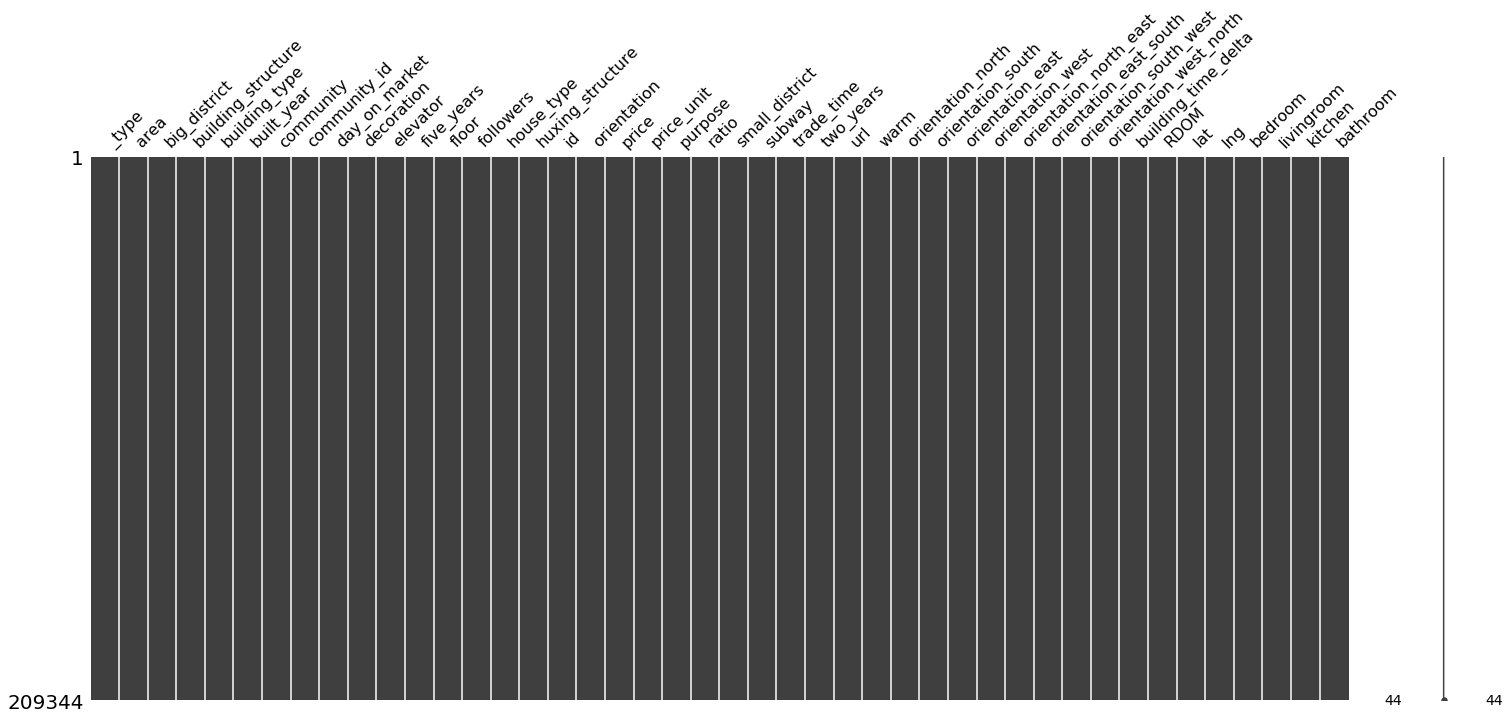

In [93]:
msno.matrix(housing)

In [94]:
# housing = housing.sample(n=50000)

In [95]:
# housing.to_csv('~/gp/datasets/cleanedtest.csv')

In [96]:
# housing['big_district'].value_counts()

In [97]:
# housing = pd.read_csv('~/gp/datasets/cleanedtest.csv')

In [98]:
# housing = housing.sample(n=50000)

In [99]:
# housing.to_csv('~/gp/datasets/cleanedtest.csv')